In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R


In [23]:
df = pd.read_csv('../Aufnahmen/data/odom.csv')
df.head()

,x,y,z,qx,qy,qz,qw
0,-0.503331,0.912730,0.0,0.0,0.0,0.195900,0.980624
1,-0.484567,0.920539,0.0,0.0,0.0,0.203749,0.979023
2,-0.468499,0.927529,0.0,0.0,0.0,0.210507,0.977592
3,-0.455352,0.933466,0.0,0.0,0.0,0.216062,0.976380
4,-0.440248,0.940495,0.0,0.0,0.0,0.222506,0.974931


In [29]:
def convert_to_euler_angles(df):
    '''
    Converts the quaternions in the dataframe to euler angles
    '''
    for i in range(len(df)):
       r = R.from_quat([df['qx'][i], df['qy'][i], df['qz'][i], df['qw'][i]])
       df.loc[i, 'roll'], df.loc[i, 'pitch'], df.loc[i, 'yaw'] = r.as_euler('xyz', degrees=True)
       
    return df

In [30]:
df = convert_to_euler_angles(df)
df.head()

,x,y,z,qx,qy,qz,qw,x-1,y-1,roll,pitch,yaw
0,-0.503331,0.912730,0.0,0.0,0.0,0.195900,0.980624,-0.484567,0.920539,0.0,0.0,22.594556
1,-0.484567,0.920539,0.0,0.0,0.0,0.203749,0.979023,-0.468499,0.927529,0.0,0.0,23.512605
2,-0.468499,0.927529,0.0,0.0,0.0,0.210507,0.977592,-0.455352,0.933466,0.0,0.0,24.304094
3,-0.455352,0.933466,0.0,0.0,0.0,0.216062,0.976380,-0.440248,0.940495,0.0,0.0,24.955724
4,-0.440248,0.940495,0.0,0.0,0.0,0.222506,0.974931,-0.429757,0.945547,0.0,0.0,25.712518


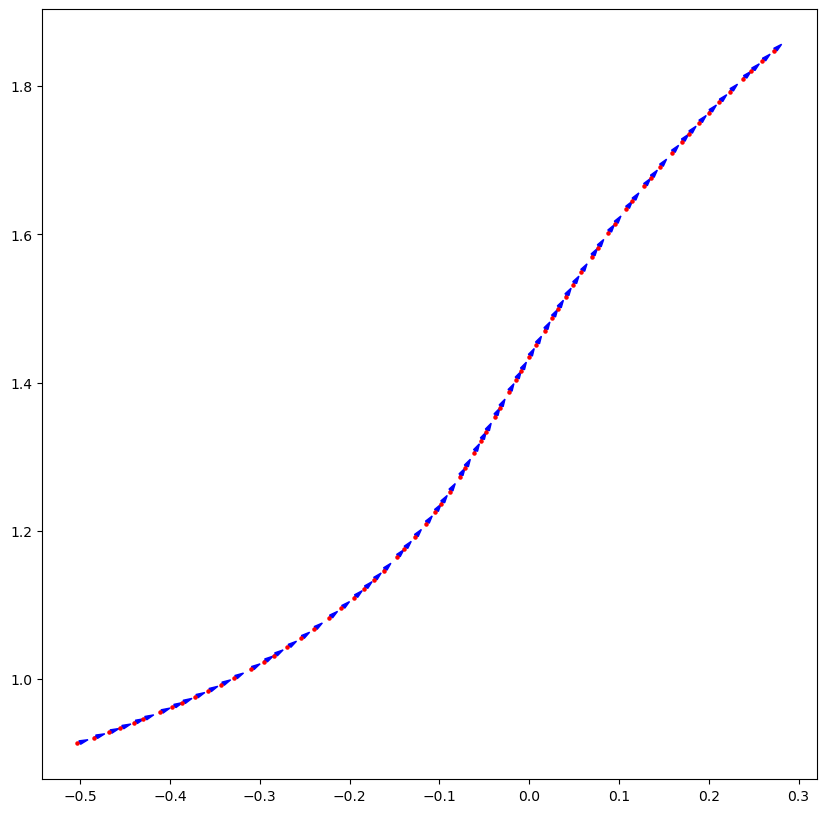

In [57]:
#visualize the trajectory
plt.figure(figsize=(10,10))
nr_points = 70
# Add arrows to indicate the direction
for i in range(nr_points):
    dx = 0.003*np.cos(np.radians(df['yaw'][i]))  # calculate the change in x
    dy = 0.003*np.sin(np.radians(df['yaw'][i]))  # calculate the change in y
    plt.arrow(df['x'][i], df['y'][i], dx, dy, head_width=0.005, head_length=0.01, fc='blue', ec='blue')
plt.scatter(df['x'][:nr_points], df['y'][:nr_points],s=5, c='red')
plt.show()

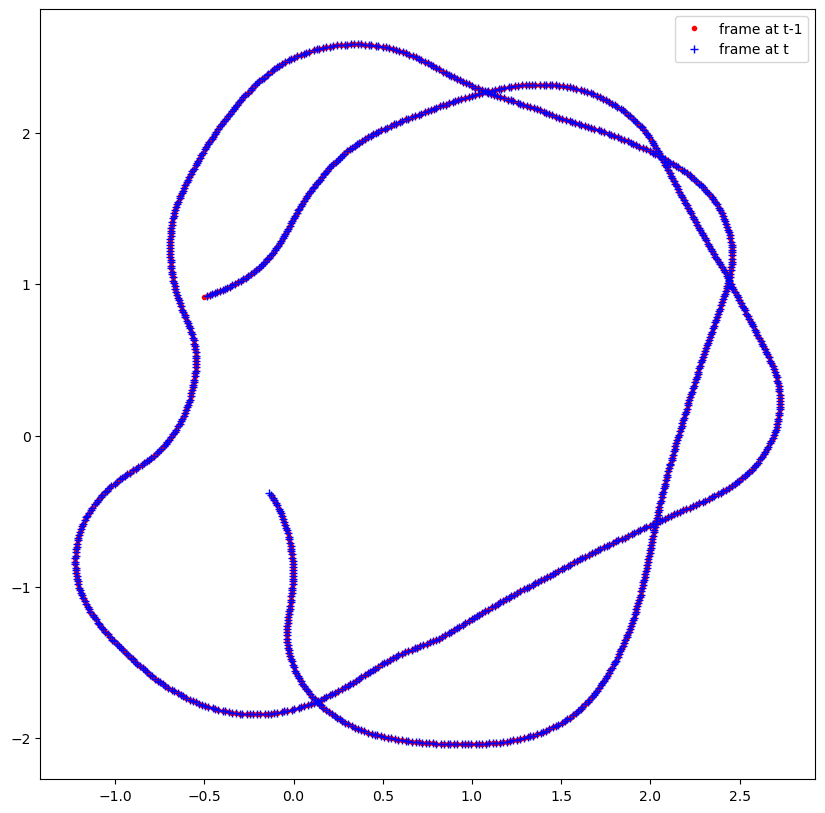

In [26]:
#visualize the difference between x, y and x-1, y-1
#make new columns x-1 y-1
df['x-1'] = df['x'].shift(-1)
df['y-1'] = df['y'].shift(-1)
#plot first 100 x, y and x-1, y-1 as markers
nr_points = 1200
plt.figure(figsize=(10,10))
plt.plot(df['x'][:nr_points], df['y'][:nr_points], 'r.',label='frame at t-1')
plt.plot(df['x-1'][:nr_points], df['y-1'][:nr_points], 'b+',label='frame at t')
plt.legend()
plt.show()


In [ ]:
from .vehicle_pose import pose
pose = pose()
#make dict with x,y,theta
dict = {'x': 0, 'y': 0, 'theta': 0}
for i in range(len(df)):
    pose.update(df['x'][i], df['y'][i], df['yaw'][i])